In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv(".\\..\\data\\raw_weather_data_new_delhi\\DailyDelhiClimateTrain.csv")
print(df.head())
print(df.tail())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
            date   meantemp    humidity  wind_speed  meanpressure
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000


In [24]:
print(df.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [26]:
figure = px.line(df, x="date", y="meantemp", title="Mean Tempereture")
figure.show()

In [27]:
figure = px.line(df, x="date", 
                 y="humidity", 
                 title='Humidity')
figure.show()

In [28]:
figure = px.line(df, x="date", 
                 y="wind_speed", 
                 title='Wind Speed')
figure.show()

In [29]:
figure = px.scatter(data_frame = df, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

In [30]:
figure = px.line(df, x="date", 
                 y="meanpressure", 
                 title='Wind Speed')
figure.show()

negative corelation

In [31]:
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df["month"] = df["date"].dt.month
print(df.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


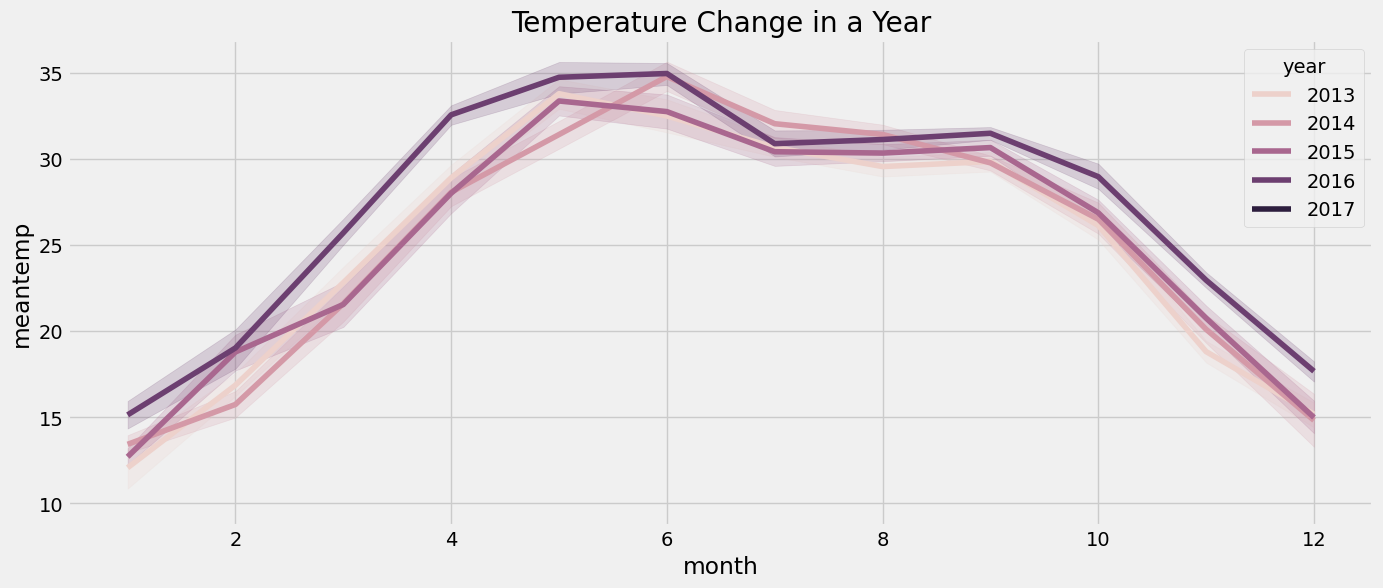

In [32]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6))
plt.title("Temperature Change in a Year")
sns.lineplot(data = df, x='month', y='meantemp', hue='year')
plt.show()

In [33]:
df["target"] = df.shift(-1)["meantemp"]
df = df.ffill()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   year          1462 non-null   int32         
 6   month         1462 non-null   int32         
 7   target        1462 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(2)
memory usage: 80.1 KB
None


In [34]:
print(df)

           date   meantemp    humidity  wind_speed  meanpressure  year  month  \
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1   
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1   
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1   
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1   
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1   
...         ...        ...         ...         ...           ...   ...    ...   
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12   
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12   
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12   
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12   
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1   

         target  
0      7.

In [35]:
df.corr()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,target
date,1.000000,0.130454,-0.050036,-0.024733,0.013823,0.968247,0.245594,0.125456
meantemp,0.130454,1.000000,-0.571951,0.306468,-0.038818,0.103803,0.122667,0.974146
humidity,-0.050036,-0.571951,1.000000,-0.373972,0.001734,-0.071381,0.074950,-0.543233
wind_speed,-0.024733,0.306468,-0.373972,1.000000,-0.020670,0.015642,-0.160668,0.287907
meanpressure,0.013823,-0.038818,0.001734,-0.020670,1.000000,0.022501,-0.035055,-0.034325
year,0.968247,0.103803,-0.071381,0.015642,0.022501,1.000000,-0.003642,0.102736
month,0.245594,0.122667,0.074950,-0.160668,-0.035055,-0.003642,1.000000,0.106894
target,0.125456,0.974146,-0.543233,0.287907,-0.034325,0.102736,0.106894,1.000000


In [36]:
predictors = df.columns[~(df.columns.isin(["target"]))]
print(predictors)

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year',
       'month'],
      dtype='object')


time series cross validation

In [37]:

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month']]
y = df['target']

ridge = Ridge()

params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# TimeSeriesSplit is used here since we're dealing with time-series data
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)

# GridSearchCV with TimeSeriesSplit
ridge_cv = GridSearchCV(ridge, params, cv=tscv, scoring='neg_mean_squared_error')
print(ridge_cv)
# Fit the model
ridge_cv.fit(X, y)

# Best alpha value
print(f"Best alpha: {ridge_cv.best_params_['alpha']}")

# Predictions
y_pred = ridge_cv.predict(X)

# Calculate RMSE (Root Mean Squared Error) for evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')
Best alpha: 0.1
RMSE: 1.6487913437751103


In [38]:
# Storing predicted values in a DataFrame
df_predictions = df.copy()
df_predictions['predicted_target'] = y_pred

# Print the DataFrame with the actual and predicted values
print(df_predictions[['date', 'target', 'predicted_target']])

           date     target  predicted_target
0    2013-01-01   7.400000         10.666696
1    2013-01-02   7.166667          8.106037
2    2013-01-03   8.666667          7.798526
3    2013-01-04   6.000000          9.198569
4    2013-01-05   7.000000          6.655770
...         ...        ...               ...
1457 2016-12-28  15.238095         17.212688
1458 2016-12-29  14.095238         15.392892
1459 2016-12-30  15.052632         14.271679
1460 2016-12-31  10.000000         15.177433
1461 2017-01-01  10.000000         10.847606

[1462 rows x 3 columns]


In [39]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Creating Plotly graph
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Add actual temperature trace
fig.add_trace(
    go.Scatter(x=df_predictions['date'], y=df_predictions['target'], mode='lines', name='Actual', line=dict(color='blue')),
)

# Add predicted temperature trace
fig.add_trace(
    go.Scatter(x=df_predictions['date'], y=df_predictions['predicted_target'], mode='lines', name='Predicted', line=dict(color='red')),
)

# Update layout
fig.update_layout(
    title="Actual vs Predicted Mean Temperature",
    xaxis_title="Date",
    yaxis_title="Mean Temperature",
    legend=dict(x=0, y=1),
    template="plotly_white",
)

# Show the plot
fig.show()

In [40]:
test_df = pd.read_csv(".\\..\\data\\raw_weather_data_new_delhi\\DailyDelhiClimateTest.csv")
test_df["date"] = pd.to_datetime(test_df["date"], format = '%Y-%m-%d')
test_df['year'] = test_df['date'].dt.year
test_df["month"] = test_df["date"].dt.month
print(test_df.head())
print(test_df.info())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
 5   year          114 non-null    int32         
 6   month         114 non-null    int32         
dt

In [41]:
test_X = test_df[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month']]
test_predict = ridge_cv.predict(test_X)
print(test_predict.__len__())
print(test_predict)

114
[16.40486657 19.01436794 17.66082835 19.11585288 18.87504141 19.74307833
 15.30173564 16.29676391 15.08659426 12.51307548 11.40519553 12.26685481
 13.63378272 13.68733595 16.90888732 15.07498903 12.26846928 13.55560929
 15.01463018 15.55618319 15.681094   18.89366826 18.55591374 18.76913737
 21.32286484 16.7492575  16.82705671 15.34006918 16.11637967 16.9529933
 16.61609167 15.72634212 17.4753837  16.16254535 19.0556084  19.01825884
 17.19816079 15.41745643 16.09413414 15.70486167 15.01319743 15.98072347
 16.70203576 16.66958505 17.18247637 17.91878419 20.38640863 21.52023926
 21.45969689 22.64753593 23.57807032 22.0414851  19.32644726 18.57464835
 19.00654266 19.06023277 18.90705225 20.12314327 23.51134066 24.51278499
 23.87496455 20.51409246 19.13942891 19.71346834 19.97789314 22.63661245
 21.59710296 21.03094026 20.12215041 18.76410798 17.5437474  17.51904838
 18.21602088 20.01410145 24.08177316 21.00115293 24.7136372  24.70884839
 23.39266577 25.00684149 27.18460322 28.09104258

In [42]:
test_predict_df = test_df.copy()
test_predict_df["predicted_mean_temp"]=test_predict
print(test_predict_df)

          date   meantemp   humidity  wind_speed  meanpressure  year  month  \
0   2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1   
1   2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1   
2   2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1   
3   2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1   
4   2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1   
..         ...        ...        ...         ...           ...   ...    ...   
109 2017-04-20  34.500000  27.500000    5.562500    998.625000  2017      4   
110 2017-04-21  34.250000  39.375000    6.962500    999.875000  2017      4   
111 2017-04-22  32.900000  40.900000    8.890000   1001.600000  2017      4   
112 2017-04-23  32.875000  27.500000    9.962500   1002.125000  2017      4   
113 2017-04-24  32.000000  27.142857   12.157143   1004.142857  2017      4   

     predicted_mean_temp  
0              16.404867

In [43]:
# Creating Plotly graph
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Add actual temperature trace
fig.add_trace(
    go.Scatter(x=test_predict_df['date'], y=test_predict_df["meantemp"], mode='lines', name='Actual', line=dict(color='blue')),
)

# Add predicted temperature trace
fig.add_trace(
    go.Scatter(x=test_predict_df['date'], y=test_predict_df["predicted_mean_temp"], mode='lines', name='Predicted', line=dict(color='red')),
)

# Update layout
fig.update_layout(
    title="Actual vs Predicted Mean Temperature",
    xaxis_title="Date",
    yaxis_title="Mean Temperature",
    legend=dict(x=0, y=1),
    template="plotly_white",
)
fig.show()

In [44]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Assuming y_true are the actual values and y_pred are the predicted values
y_true = df_predictions['target']
y_pred = df_predictions['predicted_target']

# Calculating metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
explained_variance = explained_variance_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Summary of results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 2.72
Root Mean Squared Error (RMSE): 1.65
Mean Absolute Error (MAE): 1.23
R-squared (R²): 0.95
Explained Variance Score: 0.95
Mean Absolute Percentage Error (MAPE): 5.35%
